<a href="https://colab.research.google.com/github/ekanshsinghrathore/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Closing Price Prediction**


# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **Stock Price** = Every publicly-traded company, when its shares are issued, is given a price – an assignment of their value that ideally reflects the value of the company itself. The price of a stock will go up and down in relation to a number of different factors, including changes within the economy as a whole, changes within industries, political events, war, and environmental changes.









# **Open** = An opening price is the price of a security when it is first available to be exchanged (which occurs as soon as the exchange it’s on opens).


*   It is a good indicator for people interested in making short-term trades, as a security’s opening price can help determine trading activity for the day.
*   In addition, it is a useful tool to measure swings in value for securities that have significant intra-day gains and losses.

*   A security’s opening price will not always be the same as its closing price, this can be due to after-hours trading or changes in investor valuations.


# **High** = Today's high is the highest price at which a stock traded during the course of the trading day and is typically higher than the closing or equal to the opening price. It may be used when calculating a moving average.

# **Low** = Today's low is the lowest price that a stock trades in that day.

# **Close** = closing price is the last price at which a security traded during the regular trading day. A security's closing price is the standard benchmark used by investors to track its performance over time.

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# calling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score , mean_squared_error ,mean_absolute_error

In [ ]:
# loading dataset with a 
df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [ ]:
# checking dataset
df.head(20)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [ ]:
# checking rows and columns in dataset
df.shape

(185, 5)

In [ ]:
# checking null values in a dataset
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# checking the range of dataframes for checking whether it needs normalisation or not.
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
# function to change month short name to full name in dataframe
def changedate(date):
  
  date_dict={'Jan':'January','Feb':'Feburary','Mar':'March','Apr':'April','May':'May','Jun':'June','Jul':'July','Aug':'August','Sep':'September','Oct':'October','Nov':'November','Dec':'December'}
  x=date[:-3]
  y=date_dict.get(x)
  return y


In [ ]:
# function to change year to full digit form in dataframe
def yearfullform(date):
  if date[-2]=='0':
      index= -2
      final_string = date[:index] + '20' + date[index:]
      return final_string[-4:]
  elif date[-2]=='1':
      index= -2
      final_string = date[:index] + '20' + date[index:]
      return final_string[-4:]
  elif date[-2]=='2':
      index= -2
      final_string = date[:index] + '20' + date[index:]
      return final_string[-4:]

In [ ]:
# Making new column Year in dataset
df["Year"] = df["Date"].apply(lambda x: yearfullform(x))

In [ ]:
# Making new column Month in dataset
df["Month"] = df["Date"].apply(lambda x: changedate(x))

In [ ]:
# Dropping date column in dataset becouse we already converted it to two different columns month and year
df.drop('Date', inplace=True, axis=1)

In [ ]:
# checking data types
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
Year      object
Month     object
dtype: object

In [ ]:
# checking dataset
df.head(10)

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,July
1,12.58,14.88,12.55,13.42,2005,August
2,13.48,14.87,12.27,13.30,2005,September
3,13.20,14.47,12.40,12.99,2005,October
4,13.35,13.88,12.88,13.41,2005,November
5,13.49,14.44,13.00,13.71,2005,December
6,13.68,17.16,13.58,15.33,2006,January
7,15.50,16.97,15.40,16.12,2006,Feburary
8,16.20,20.95,16.02,20.08,2006,March
9,20.56,20.80,18.02,19.49,2006,April


In [ ]:
# calculating monthly mean
mean_of_close=df.groupby('Month')['Close'].mean()

In [ ]:
mean_of_close

Month
April        114.450000
August       103.386875
December     100.724000
Feburary     107.760667
January      108.774667
July         108.322500
June         109.661333
March        113.014000
May          112.874667
November      94.671250
October       97.399375
September     93.343750
Name: Close, dtype: float64

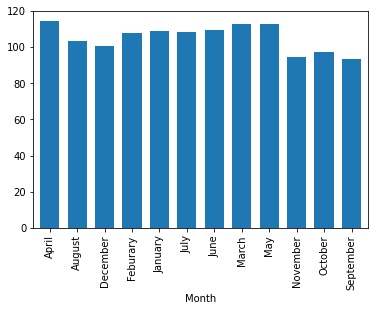

In [ ]:
# as we can see from this bar graph the averages of independent variables is nearly same for all months 
# so we can conclude that month being a independent variable doesnot make much change to predictions
mean_of_close.plot.bar(width=0.7)
plt.show()

In [ ]:
# checking the dataframe again
df.head()

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,July
1,12.58,14.88,12.55,13.42,2005,August
2,13.48,14.87,12.27,13.30,2005,September
3,13.20,14.47,12.40,12.99,2005,October
4,13.35,13.88,12.88,13.41,2005,November


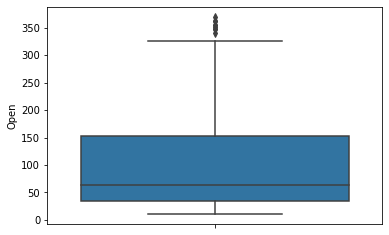

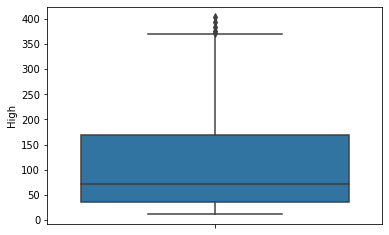

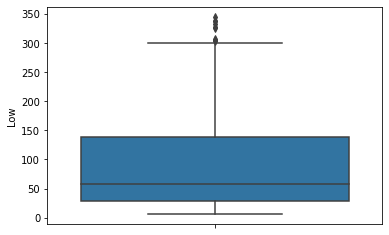

In [ ]:
# as we can see in box plot there are very less outliers in dataset , it does not tend to effect much of our prediction
df_column_list=['Open','High','Low']
for a in df_column_list:
  open_box_plot=sns.boxplot(y =a, data = df)
  open_box_plot.set_xticklabels(open_box_plot.get_xticklabels(),rotation=30)
  plt.show()

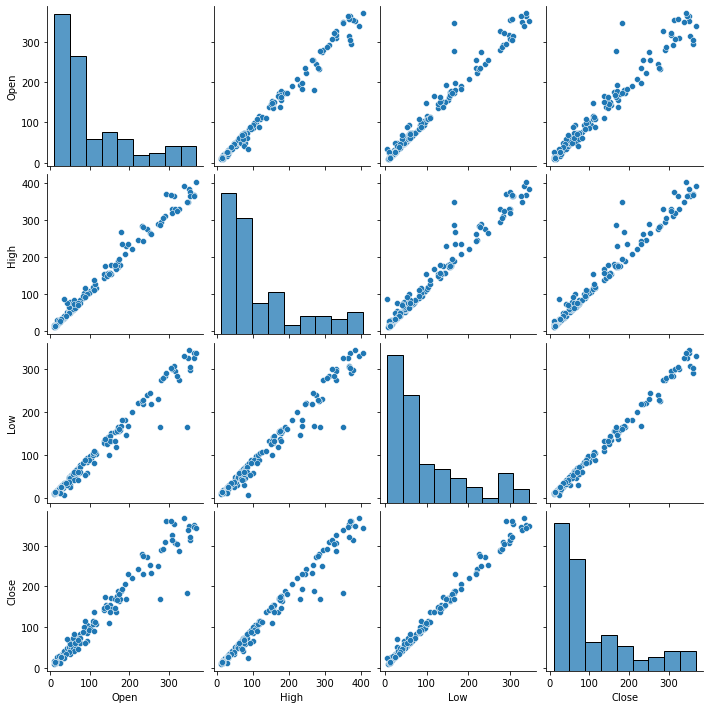

In [ ]:
# graph showing high degree of positive correlation between each and every variable in data
sns.pairplot(df[['Open','High','Low','Close']])
plt.show()

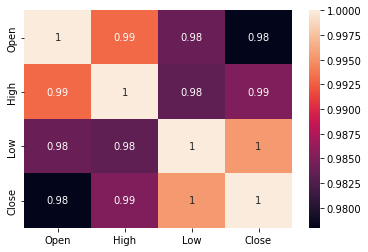

In [ ]:
# in correlation heatmap we can see the vairables are highly positively correlated with each other
# low and close showing highest possible value of correlation.
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# three independent variables
independent_variables = ['Low','High','Open']

In [ ]:
independent_variables

['Low', 'High', 'Open']

In [ ]:
# dependent variable
dependent_variable='Close'

In [ ]:
# storing values in X and y of both types of variables
X = df[independent_variables].values

y = df[dependent_variable].values

In [ ]:
df[independent_variables]

,Low,High,Open
0,11.25,14.00,13.00
1,12.55,14.88,12.58
2,12.27,14.87,13.48
3,12.40,14.47,13.20
4,12.88,13.88,13.35
...,...,...,...
180,11.10,28.30,25.60
181,11.85,17.16,12.00
182,12.75,15.34,14.30
183,12.11,14.01,13.30


In [ ]:
# we are taking 80% for training and remaining 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# checking training data
X_train[0:10]

array([[ 51.2 ,  60.08,  56.  ],
       [304.65, 366.5 , 355.  ],
       [ 11.25,  17.8 ,  14.79],
       [ 86.98, 117.6 ,  88.8 ],
       [ 29.11,  36.14,  30.66],
       [103.31, 118.69, 107.4 ],
       [ 53.15,  92.4 ,  89.2 ],
       [325.7 , 364.4 , 362.85],
       [ 62.14,  70.6 ,  65.45],
       [ 97.2 , 109.43, 100.99]])

In [ ]:
# The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively.
# While the StandardScaler scales all values between min and max so that they fall within a range from min to max.
scaler = MinMaxScaler()


In [ ]:
# fiting scaler values in X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression 

In [ ]:
# Calling Linear Regression Algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# intercept is the mean value of the response variable when all of the predictor variables in the model are equal to zero.
regressor.intercept_

7.923809718936255

In [ ]:
# coefficients are the values that multiply the predictor values
regressor.coef_

array([ 342.40720687,  173.83063092, -150.64116876])

In [ ]:
# prediciting values of testing datasets
y_pred_train = regressor.predict(X_train)

In [ ]:
y_pred_train

array([ 56.73682879, 323.55353239,  14.88667474, 104.95218487,
        34.43561931, 113.91503261,  59.20399858, 340.42814545,
        68.5018042 , 106.28537006, 142.47029807,  39.27077783,
        95.5026846 , 108.52570693, 135.33035225,  16.39630183,
        95.49541051,  70.53212598,  15.13893523,  57.76436716,
        79.87897214, 181.39861066,  12.22370848,  19.14509771,
       104.49062703,  54.85146017,  29.65262039, 107.94412969,
       168.52847013, 126.55281435,  47.93556602, 374.06068066,
        26.55278437,  38.35406133, 152.63643666,  94.05457152,
        64.62993064, 198.30443535,  15.22556987,  67.26256942,
        33.32013947,  29.17653724,  70.32201038,  19.25759583,
       293.3159264 ,  34.45824425,  15.5514139 , 126.65397016,
        27.09606496,  23.39780172,  58.00805689,  74.62865893,
        50.03146683,  70.40485771,  56.57427191,  15.20747325,
        14.66250246, 177.14357195,  17.41778895,  60.45622608,
        56.71295171,  73.9944235 , 232.93477151,  16.68

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
#Predicted profit on the test data
y_pred

array([ 32.28556301, 141.3181093 ,  44.90843414, 142.02014391,
        67.16064541,  32.80575776, 232.4025937 ,  18.38312048,
        15.67365593, 213.61676302, 300.0063749 ,  87.56250111,
       153.82787123,  59.9852477 , 341.93643068, 259.94053128,
        74.74137531,  29.07428245, 259.92075347,  51.81123318,
        10.83593004, 118.44738333, 146.97256691,  60.0139961 ,
       217.57363908,  47.99821826, 249.71964854,  15.35727363,
       108.65154467,  53.49733069, 367.84444567, 338.68544675,
        73.75276568, 167.7615893 ,  40.3382692 ,  49.16808148,
       261.77902456, 146.51590507,  20.52376167,  66.0750167 ,
        50.60227847,  15.47343305,  61.81720652,  52.66733829,
        40.3416129 ,  36.14162654,  14.88868061,  91.17006182,
        15.48500069,  37.41713079,  30.6905884 , 322.16111205,
        74.39036805, 343.64109622,  26.54241918,  45.05181164])

In [ ]:
# Actual predictions on test data
y_test

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52, 154.57,  20.08,  64.76,
        41.45,  15.45,  57.5 ,  50.97,  37.93,  50.54,  11.95,  85.71,
        13.15,  34.55,  28.63, 326.14,  73.46, 354.45,  25.32,  47.31])

Performance Matrix How good my model performed

In [ ]:
# mean squared error of testing dataset
mean_squared_error(y_test, y_pred)

62.378015533103174

In [ ]:
# mean squared error of training dataset
mean_squared_error(y_train, y_pred_train)

42.752857747735895

In [ ]:
# r2 sqaure of training dataset
r2_score(y_train, y_pred_train)

0.9952288628537579

In [ ]:
# r2 square of testing dataset
r2_score(y_test, y_pred)

0.9944176561688847

# K-nearest Neighbours Regression

In [ ]:
# Importing KNN from sklearn library
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors =3)

In [ ]:
# Fitting the model
knn_model=knn_regressor.fit(X_train,y_train)

In [ ]:
# prediciting values
y_knn_train_pred = knn_model.predict(X_train)
y_knn_test_pred = knn_model.predict(X_test)

In [ ]:
# r2 of training dataset
r2_score(y_train , y_knn_train_pred )

0.9906219408884804

In [ ]:
# accuracy of testing dataset
r2_score(y_test , y_knn_test_pred )

0.9900999048097555

In [ ]:
# training dataset mean_squared_error
mean_squared_error(y_train ,y_knn_train_pred )

84.03422807924198

In [ ]:
# testing dataset mean_absolute_error
mean_absolute_error(y_train , y_knn_train_pred )

5.052558139534883

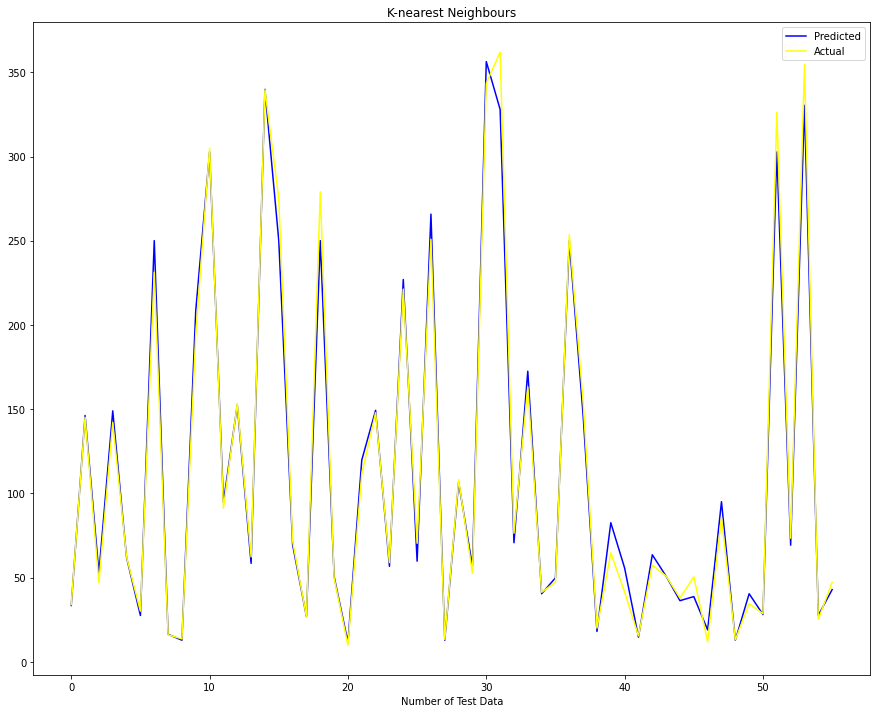

In [ ]:
# K-nearest Neighbours Visuzalization
plt.figure(figsize=(15,12))
plt.plot(y_knn_test_pred,color='blue')
plt.plot(np.array(y_test),color='yellow')
plt.title('K-nearest Neighbours')
plt.legend(["Predicted","Actual"])
plt.xlabel('Number of Test Data')
plt.show()

# Support Vector Machine

In [ ]:
# importing Support Vector Machine
from sklearn.svm import SVR

In [ ]:
#Linear
svm_regressor = SVR(kernel='linear')
#Fitting the model
svm_model=svm_regressor.fit(X_train,y_train)

In [ ]:
# Predicting Values
y_svm_train_pred = svm_model.predict(X_train)
y_svm_test_pred = svm_model.predict(X_test)

In [ ]:
# Training set accuracy
r2_score(y_train , y_svm_train_pred )

0.26147764017069175

In [ ]:
mean_squared_error(y_train ,y_svm_train_pred )

6617.697296371613

In [ ]:
mean_absolute_error(y_train , y_svm_train_pred )

53.369100068789564

In [ ]:
# Testing set accuracy
r2_score(y_test , y_svm_test_pred )

0.2024063799366448

In [ ]:
mean_squared_error(y_test ,y_svm_test_pred )

8912.440495711222

In [ ]:
mean_absolute_error(y_test , y_svm_test_pred )

63.16418144817438

# Gradient Boosting

In [ ]:
# Importing gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# setting model and giving hyperparametres to it
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 1)

In [ ]:
# Fit to training set
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=200, random_state=1)

In [ ]:
# Predict on test set
pred_y_train = gbr.predict(X_train)
pred_y_test = gbr.predict(X_test)

In [ ]:
# Training set accuracy
r2_score(y_train , pred_y_train )

0.9980867489430983

In [ ]:
mean_squared_error(y_train ,pred_y_train )

17.1441205239403

In [ ]:
mean_absolute_error(y_train , pred_y_train )

2.8866723780214985

In [ ]:
# Testing set accuracy
r2_score(y_test , pred_y_test )

0.9863838480171905

In [ ]:
mean_squared_error(y_test ,pred_y_test )

152.14909105931815

In [ ]:
mean_absolute_error(y_test , pred_y_test )

7.817131414100244

# XG Boost

In [ ]:
# Importing XG Boost
import xgboost as xgb

In [ ]:
# setting model and fitting data
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
# Predicting the Test and Train set results
y_pred_test = xgboost.predict(X_test)
y_pred_train = xgboost.predict(X_train)

In [ ]:
# Training set accuracy
r2_score(y_train , y_pred_train )

-0.9246823121458032

In [ ]:
mean_squared_error(y_train ,y_pred_train )

17246.55288217054

In [ ]:
mean_absolute_error(y_train , y_pred_train )

91.02651162790698

In [ ]:
# Testing set accuracy
r2_score(y_test , y_pred_test )

-0.9673989051269292

In [ ]:
mean_squared_error(y_test ,y_pred_test)

21984.034516071428

In [ ]:
mean_absolute_error(y_test , y_pred_test )

103.98053571428571

# Ridge Regressor

In [ ]:
# importing libraries
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston

In [ ]:
# fitting model
ridge_model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, solver ='auto', random_state = 42)
ridge_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Ridge(alpha=0.5, normalize=False, random_state=42)

In [ ]:
# predicting the test and train
y_pred_ridge_test = ridge_model.predict(X_test)
y_pred_ridge_train = ridge_model.predict(X_train)

In [ ]:
# Training set accuracy
r2_score(y_train , y_pred_ridge_train )

0.9853840249851047

In [ ]:
mean_squared_error(y_train , y_pred_ridge_train )

130.96976286847047

In [ ]:
mean_absolute_error(y_train , y_pred_ridge_train )

6.744237500659027